# Katrina Tidal Guages

In [14]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

In [21]:
from src.constants import KATRINA_TIDE_NC, NEW_ORLEANS

In [40]:
ds = xr.open_dataset(KATRINA_TIDE_NC)

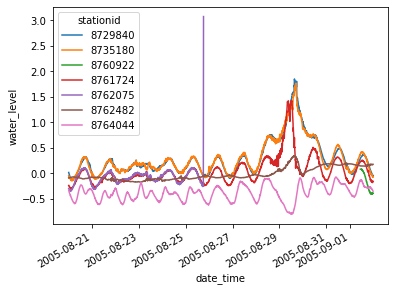

In [41]:
ds.water_level.plot.line(hue="stationid")

In [13]:
?ccrs.PlateCarree

In [48]:
ds["stationid"].values

array(['8729840', '8735180', '8760922', '8761724', '8762075', '8762482',
       '8764044'], dtype=object)

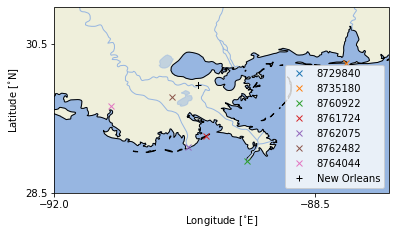

In [46]:
#fig, axs = plt.subplots(2,1)
ax = plt.axes( projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

ax.set_extent([-91.6, -87.5, 28.5, 31])

for stationid in ds["stationid"].values:
    ax.plot(
        ds.sel(stationid=stationid).lon.values,
        ds.sel(stationid=stationid).lat.values,
        "x",
        label=stationid,
    )


ax.plot(NEW_ORLEANS[0], NEW_ORLEANS[1], "+", color="black", label="New Orleans")


ax.set_xticks([-92, -88.5], crs=ccrs.PlateCarree())
ax.set_yticks([28.5, 30.5], crs=ccrs.PlateCarree())

ax.set_ylabel("Latitude [$^{\circ}$N]")
ax.set_xlabel("Longitude [$^{\circ}$E]")
plt.legend()
plt.show()

In [31]:
?plt.axes

In [47]:
?plt.legend